# CNN for CIFAR-10 Image Classification
## Gabriele Marino (MAT: 604453)

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import MSE
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 1. Dataset Loading and Preprocessing

The dataset is loaded and preprocessed: the images are rescaled in the range [0, 1] and the labels are one-hot encoded.

In [2]:
cifar10_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 2. Model Definition

The model defined is a VGG-standardized model with increasing dropout regularization and batch normalization.

In [3]:
model = Sequential()

# First Convolutional block
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Second Convolutional block
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Third Convolutional block
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Fully connected block
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

## 3. Model Training and Evaluation

The model is trained using data augmentation.

In [4]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_test, y_test), steps_per_epoch=(X_train.shape[0]) / 64, epochs=300)

Epoch 1/300
781/781 [==============================] - 164s 209ms/step - loss: 2.1441 - accuracy: 0.2952 - val_loss: 1.4859 - val_accuracy: 0.4523
Epoch 2/300
781/781 [==============================] - 170s 218ms/step - loss: 1.6118 - accuracy: 0.4111 - val_loss: 1.3964 - val_accuracy: 0.4761
Epoch 3/300
781/781 [==============================] - 171s 219ms/step - loss: 1.4826 - accuracy: 0.4532 - val_loss: 1.4843 - val_accuracy: 0.4442
Epoch 4/300
781/781 [==============================] - 172s 220ms/step - loss: 1.3968 - accuracy: 0.4911 - val_loss: 1.4088 - val_accuracy: 0.4815
Epoch 5/300
781/781 [==============================] - 172s 220ms/step - loss: 1.3336 - accuracy: 0.5160 - val_loss: 1.2436 - val_accuracy: 0.5360
Epoch 6/300
781/781 [==============================] - 174s 222ms/step - loss: 1.2843 - accuracy: 0.5387 - val_loss: 1.3263 - val_accuracy: 0.5184
Epoch 7/300
781/781 [==============================] - 177s 227ms/step - loss: 1.2460 - accuracy: 0.5517 - val_loss: 1

781/781 [==============================] - 182s 233ms/step - loss: 0.5114 - accuracy: 0.8248 - val_loss: 0.4606 - val_accuracy: 0.8425
Epoch 112/300
781/781 [==============================] - 181s 231ms/step - loss: 0.5077 - accuracy: 0.8252 - val_loss: 0.4981 - val_accuracy: 0.8290
Epoch 113/300
781/781 [==============================] - 178s 228ms/step - loss: 0.5087 - accuracy: 0.8255 - val_loss: 0.5086 - val_accuracy: 0.8307
Epoch 114/300
781/781 [==============================] - 179s 229ms/step - loss: 0.5090 - accuracy: 0.8256 - val_loss: 0.4717 - val_accuracy: 0.8422
Epoch 115/300
781/781 [==============================] - 178s 228ms/step - loss: 0.5013 - accuracy: 0.8289 - val_loss: 0.5065 - val_accuracy: 0.8324
Epoch 116/300
781/781 [==============================] - 177s 227ms/step - loss: 0.5030 - accuracy: 0.8278 - val_loss: 0.4679 - val_accuracy: 0.8455
Epoch 117/300
781/781 [==============================] - 178s 227ms/step - loss: 0.5004 - accuracy: 0.8284 - val_loss: 0

781/781 [==============================] - 170s 217ms/step - loss: 0.4326 - accuracy: 0.8519 - val_loss: 0.3980 - val_accuracy: 0.8659
Epoch 167/300
781/781 [==============================] - 173s 221ms/step - loss: 0.4333 - accuracy: 0.8513 - val_loss: 0.4319 - val_accuracy: 0.8561
Epoch 168/300
781/781 [==============================] - 172s 220ms/step - loss: 0.4244 - accuracy: 0.8549 - val_loss: 0.4065 - val_accuracy: 0.8646
Epoch 169/300
781/781 [==============================] - 170s 217ms/step - loss: 0.4292 - accuracy: 0.8538 - val_loss: 0.4290 - val_accuracy: 0.8582
Epoch 170/300
781/781 [==============================] - 170s 218ms/step - loss: 0.4325 - accuracy: 0.8526 - val_loss: 0.3967 - val_accuracy: 0.8670
Epoch 171/300
781/781 [==============================] - 171s 219ms/step - loss: 0.4271 - accuracy: 0.8535 - val_loss: 0.4121 - val_accuracy: 0.8651
Epoch 172/300
781/781 [==============================] - 171s 219ms/step - loss: 0.4219 - accuracy: 0.8551 - val_loss: 0

781/781 [==============================] - 177s 227ms/step - loss: 0.3800 - accuracy: 0.8696 - val_loss: 0.3979 - val_accuracy: 0.8674
Epoch 222/300
781/781 [==============================] - 178s 227ms/step - loss: 0.3763 - accuracy: 0.8711 - val_loss: 0.3691 - val_accuracy: 0.8787
Epoch 223/300
781/781 [==============================] - 177s 227ms/step - loss: 0.3779 - accuracy: 0.8701 - val_loss: 0.3971 - val_accuracy: 0.8719
Epoch 224/300
781/781 [==============================] - 177s 226ms/step - loss: 0.3770 - accuracy: 0.8721 - val_loss: 0.3880 - val_accuracy: 0.8733
Epoch 225/300
781/781 [==============================] - 178s 227ms/step - loss: 0.3763 - accuracy: 0.8722 - val_loss: 0.3713 - val_accuracy: 0.8766
Epoch 226/300
781/781 [==============================] - 178s 228ms/step - loss: 0.3788 - accuracy: 0.8706 - val_loss: 0.3876 - val_accuracy: 0.8737
Epoch 227/300
781/781 [==============================] - 179s 229ms/step - loss: 0.3726 - accuracy: 0.8712 - val_loss: 0

781/781 [==============================] - 172s 220ms/step - loss: 0.3422 - accuracy: 0.8824 - val_loss: 0.3745 - val_accuracy: 0.8795
Epoch 277/300
781/781 [==============================] - 173s 221ms/step - loss: 0.3424 - accuracy: 0.8841 - val_loss: 0.3912 - val_accuracy: 0.8712
Epoch 278/300
781/781 [==============================] - 174s 222ms/step - loss: 0.3396 - accuracy: 0.8846 - val_loss: 0.3625 - val_accuracy: 0.8840
Epoch 279/300
781/781 [==============================] - 173s 221ms/step - loss: 0.3410 - accuracy: 0.8833 - val_loss: 0.4044 - val_accuracy: 0.8700
Epoch 280/300
781/781 [==============================] - 173s 222ms/step - loss: 0.3438 - accuracy: 0.8826 - val_loss: 0.3687 - val_accuracy: 0.8805
Epoch 281/300
781/781 [==============================] - 174s 222ms/step - loss: 0.3366 - accuracy: 0.8844 - val_loss: 0.3724 - val_accuracy: 0.8816
Epoch 282/300
781/781 [==============================] - 174s 223ms/step - loss: 0.3393 - accuracy: 0.8835 - val_loss: 0

In [5]:
model.save("models/CNN.h5")
np.savez("models/CNN-history", loss=history.history["loss"], val_loss=history.history["val_loss"], accuracy=history.history["accuracy"], val_accuracy=history.history["val_accuracy"])

For visualization purposes the learning curves of the model are plotted below.

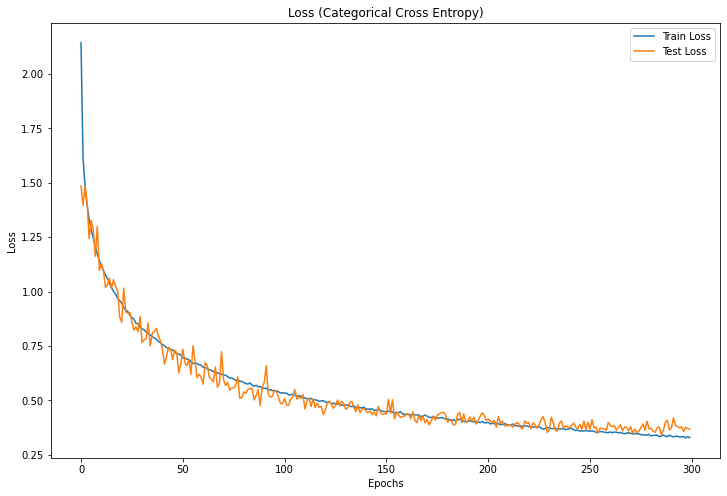

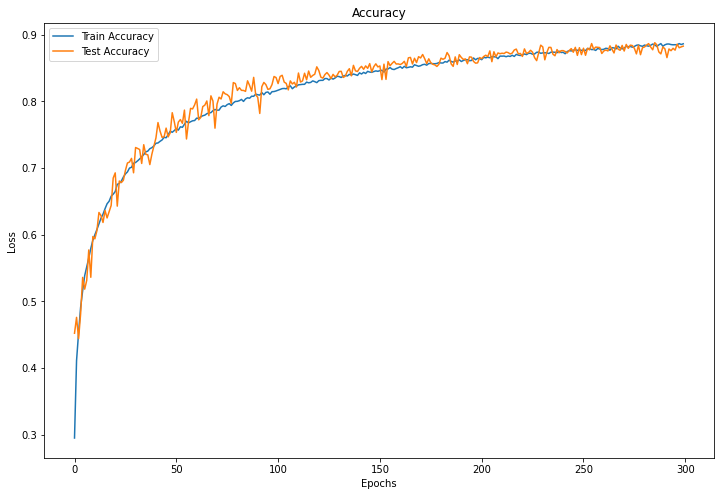

In [6]:
model = load_model("models/CNN.h5")
history = np.load("models/CNN-history.npz")

plt.figure(figsize=(12, 8))
plt.title("Loss (Categorical Cross Entropy)")
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.title("Accuracy")
plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model is finally tested and achieves a good accuracy score.

In [7]:
__, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Test accuracy: {round(accuracy * 100, 2)}")

Test accuracy: 88.28


## 4. FGSM Adversarial Attack

The next function makes use of tensorflow automatic differentiation tools to compute the gradient sign of a sample image for a given model. 

In [8]:
def compute_gradient_sign(model, image, label):

    image = tf.cast(image, "float32")

    with tf.GradientTape() as tape:

        tape.watch(image)

        prediction = model(image)
        loss = MSE(label, prediction)

        gradient = tape.gradient(loss, image)
        gradient_sign = tf.sign(gradient)

    return gradient_sign

The following code produces an adversarial sample for the first image of the dataset. The original immage, the gradient sign and the adversarial sample are plotted for visualization purposes.

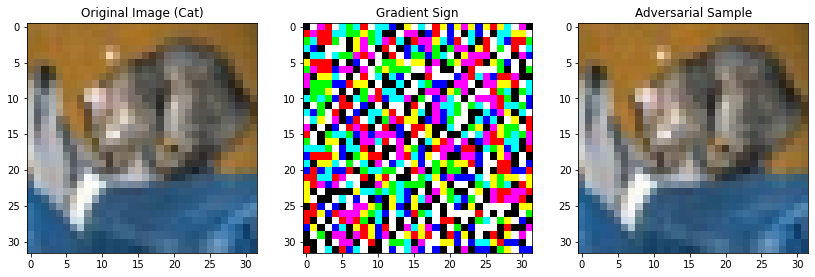

In [9]:
image = X_test[0]
label = y_test[0]
class_name = cifar10_classes[np.argmax(label)]

epsilon = 0.007

gradient_sign = compute_gradient_sign(model, image.reshape(1, 32, 32, 3), label)[0]
adversarial_sample = image + gradient_sign * epsilon
adversarial_sample = np.clip(adversarial_sample, 0, 1)

fig, axs = plt.subplots(1, 3, figsize = (14, 6))
axs[0].set_title(f"Original Image ({class_name})")
axs[0].imshow(image)
axs[1].set_title("Gradient Sign")
axs[1].imshow(np.clip(gradient_sign, 0, 1))
axs[2].set_title("Adversarial Sample")
axs[2].imshow(adversarial_sample)
plt.show()

Finally the model is tested on both the original image and the adversarial sample.

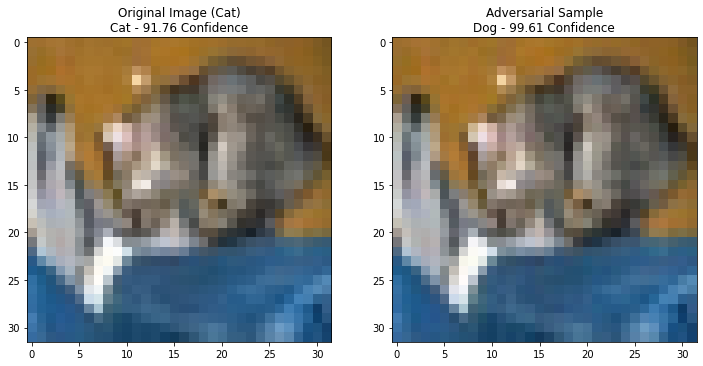

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (12, 8))

prediction = model.predict(image.reshape(1, 32, 32, 3))
predicted_class = cifar10_classes[np.argmax(prediction)]
confidence = np.max(prediction)

axs[0].set_title(f"Original Image (Cat)\n{predicted_class} - {round(confidence * 100, 2)} Confidence")
axs[0].imshow(image)

prediction = model.predict(adversarial_sample.reshape(1, 32, 32, 3))
predicted_class = cifar10_classes[np.argmax(prediction)]
confidence = np.max(prediction)

axs[1].set_title(f"Adversarial Sample\n{predicted_class} - {round(confidence * 100, 2)} Confidence")
axs[1].imshow(np.clip(adversarial_sample, 0, 1))

plt.show()

## 5. Comments and Results

The CNN model was straightforward to implement. I started from a simple VGG-standard model and then made use of the techniques we had seen during the lectures (batch normalization and dropout) to improve the performances of the model. The accuracy achieved was quite satisfactory, but improvable. Still, the fact that the training was very slow (about twelve hours) discouraged me from trying different models.  
The FGSM implementation was straightforward, too. I found this method conceptually and implementative easy and interesting, so I chose to implement it by myself instead of using an existing library. I truly enjoyed this part of the assignment and I was impressed by the strength of the obtained results.